<a href="https://colab.research.google.com/github/ludwigwittgenstein2/Research/blob/master/Novel_Address_Using_LLM_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Title: Novel Address Generation using LLM and LSTM
### by Rick Rejeleene

Generative Models, mostly we are using to generate any artifact [text, audio, video]

Feedback:

Evaluation: Include in Dissertation

How factual is it? (correct)

How accurate is it [creativity]

How measure result of generative language models?

Misused (Toxic) 

Direction: Is the generated text from? Is it from AI model or not AI model?


## First we approach using GPT-2 Model - Why?

a. GPT-2 is popular model of recent 

b. We try to use our dataset on GPT-2

c. We try to get results



###Goal of the Work: 

a. Apply Language Model 

b. Apply LSTM or variation of LSTM

c. Use Census dataset [Name-Address]

d. Compare results 

e. Write Paper/Results


In [ ]:
#install dependencies 


In [ ]:
!pip install -q gpt-2-simple
import gpt_2_simple as gpt2
from datetime import datetime
from google.colab import files

  Preparing metadata (setup.py) ... done


In [ ]:
#Check GPU 

In [ ]:
!nvidia-smi

Sun Feb  5 01:40:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    30W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
gpt2.download_gpt2(model_name="124M")

Fetching checkpoint: 1.05Mit [00:00, 489Mit/s]                                                      
Fetching encoder.json: 1.05Mit [00:00, 1.06Mit/s]
Fetching hparams.json: 1.05Mit [00:00, 737Mit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:49, 10.0Mit/s]
Fetching model.ckpt.index: 1.05Mit [00:00, 430Mit/s]                                                
Fetching model.ckpt.meta: 1.05Mit [00:00, 1.21Mit/s]
Fetching vocab.bpe: 1.05Mit [00:00, 1.41Mit/s]


In [ ]:
gpt2.mount_gdrive()

Mounted at /content/drive


In [ ]:
#upload our own dataset 

In [ ]:
file_name = 'CleanedDatasetEntire1.txt'

In [ ]:
gpt2.copy_file_from_gdrive(file_name)

In [ ]:
#Train Model

In [ ]:
sess = gpt2.start_tf_sess()

gpt2.finetune(sess,
              dataset=file_name,
              model_name='124M',
              steps=1000,
              restore_from='fresh',
              run_name='run1',
              print_every=10,
              sample_every=200,
              save_every=500
              )

Loading checkpoint models/124M/model.ckpt
Loading dataset...


100%|██████████| 1/1 [00:00<00:00, 2535.85it/s]

dataset has 17233 tokens
Training...


[10 | 26.89] loss=2.51 avg=2.51
[20 | 49.81] loss=1.88 avg=2.19
[30 | 73.05] loss=1.61 avg=2.00
[40 | 95.86] loss=1.40 avg=1.84
[50 | 118.74] loss=1.25 avg=1.72
[60 | 141.80] loss=1.08 avg=1.61
[70 | 164.81] loss=0.90 avg=1.51
[80 | 187.74] loss=0.72 avg=1.41
[90 | 210.70] loss=0.63 avg=1.32
[100 | 233.72] loss=0.46 avg=1.23
[110 | 256.75] loss=0.38 avg=1.15
[120 | 279.75] loss=0.27 avg=1.07
[130 | 302.75] loss=0.18 avg=1.00
[140 | 325.76] loss=0.16 avg=0.93
[150 | 348.75] loss=0.08 avg=0.87
[160 | 371.73] loss=0.09 avg=0.82
[170 | 394.69] loss=0.06 avg=0.77
[180 | 417.66] loss=0.07 avg=0.73
[190 | 440.62] loss=0.06 avg=0.69
[200 | 463.56] loss=0.05 avg=0.65
======== SAMPLE 1 ========
 MAN QC, "ARLINGTON ,TX 78382"
366	"Mr. Zach Bourne , Jr, CLIA,"	"6875 EDINBURGH RD, CORONA ,CA 92880"
367	"Mrs. Rachel Bourne , Jr, QC,"	"1732 ANDY WILLIAMS DR, ANAHEIM ,CA 92804"
368	"Ms. Brooke Bourne , Jr, QA,"	"15123 KING PL, SHERMAN OAKS ,FL 34905"
369	"Ms. Ashley Bourne , Jr, IQCP,"	"4731 DASHWOOD,

Instructions for updating:
Use standard file APIs to delete files with this prefix.


In [ ]:
gpt2.copy_checkpoint_to_gdrive(run_name='run1')

In [ ]:
gpt2.copy_checkpoint_from_gdrive(run_name='run1')

In [ ]:
import tensorflow as tf 
tf.compat.v1.reset_default_graph()

In [ ]:

sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, run_name='run1')

Loading checkpoint checkpoint/run1/model-592


In [ ]:
#Generate our data from Model

In [ ]:
"""

Consider parameters

length: Number of tokens to generate (default 1023, the maximum)
temperature: The higher the temperature, the crazier the text (default 0.7, recommended to keep between 0.7 and 1.0)
top_k: Limits the generated guesses to the top k guesses (default 0 which disables the behavior; if the generated output is super crazy, you may want to set top_k=40)
top_p: Nucleus sampling: limits the generated guesses to a cumulative probability. (gets good results on a dataset with top_p=0.9)
truncate: Truncates the input text until a given sequence, excluding that sequence (e.g. if truncate='<|endoftext|>', 
the returned text will include everything before the first <|endoftext|>). 
It may be useful to combine this with a smaller length if the input texts are short.
include_prefix: If using truncate and include_prefix=False, the specified prefix will not be included in the returned text.

"""

"\n\nConsider parameters\n\nlength: Number of tokens to generate (default 1023, the maximum)\ntemperature: The higher the temperature, the crazier the text (default 0.7, recommended to keep between 0.7 and 1.0)\ntop_k: Limits the generated guesses to the top k guesses (default 0 which disables the behavior; if the generated output is super crazy, you may want to set top_k=40)\ntop_p: Nucleus sampling: limits the generated guesses to a cumulative probability. (gets good results on a dataset with top_p=0.9)\ntruncate: Truncates the input text until a given sequence, excluding that sequence (e.g. if truncate='<|endoftext|>', \nthe returned text will include everything before the first <|endoftext|>). \nIt may be useful to combine this with a smaller length if the input texts are short.\ninclude_prefix: If using truncate and include_prefix=False, the specified prefix will not be included in the returned text.\n\n"

In [ ]:
single_text = gpt2.generate(sess, return_as_list=True)
print((single_text))

['Mr. Michael Bognar , Jr, IQCP,"\t"25781 STEPHENS ST, ESPARTO ,CA 95627"\n399\t"Dean. Eloise Bognar , Jr, CLIA,"\t"1097 MANIGAN AVE, OVIEDO ,FL 32765"\n400\t"Dr. Holly Bognar , Jr, QC,"\t"1716 NAKAMO ST, APT 4, TWENTYNINE PALMS ,CA 92277"\n401\t"Mr. Damon Bregman , Jr, QA,"\t"104 1/2 NAKAMO ST, APT 416, TWENTYNINE ,CA 92277"\n402\t"Mr. Erik Bunn , Sr, IQCP,"\t"19054 PARTHENIA ST, APT 5, NORTHRIDGE ,CA 91324"\n403\t"Mr. Lane Brown , PhD, CLIA,"\t"1667 PINEVIEW LN, ARLINGTON ,TX 76531"\n404\t"Mrs. Sharon Brown , PhD, QC,"\t"1117 E FELICITA AVE, ESCONDIDO ,CA 92025"\n405\t"Ms. Carissa Brown , PhD, QA,"\t"1431 FORRESTAL AVE, SAN JOSE ,CA 95110"\n406\t"Mr. Buchella Brown , Jr, IQCP,"\t"1840 E LA PALMA AVE, ANAHEIM ,CA 92805"\n407\t"Mr. Daniel Brown , Sr, CLIA,"\t"1050 BENTON ST, APT 1329, SANTA CLARA ,CA 95050"\n408\t"Dean. Justine Brown , Sr, QC,"\t"1121 CROMWELL ST, POMONA ,CA 91768"\n409\t"Dr. Claire Brown , PhD, QA,"\t"33519 WINSTON WAY, UNIT A, TEMECULA ,CA 92592"\n410\t"Col. Mrs. Rac

In [ ]:
import csv

with open('single_text.txt', 'w') as f:
	# using csv.writer method from CSV package
	write = csv.writer(f)
	write.writerow(single_text)
 


In [ ]:
import csv

# Open a CSV file for writing and write the text to it
with open('data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(single_text)

print("Data exported to data.csv successfully!")


Data exported to data.csv successfully!


In [ ]:
import csv 

with open('data.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(single_text)

print("Data exported to data.csv successfully!")



Data exported to data.csv successfully!


In [ ]:
gpt2.generate(sess, run_name='run1')[0]

AROUND AUGUSTINE ,FL 32084"
227	"Dean. Julia Bigby , Jr, CLIA,"	"6676 COLGATE AVE, LOS ANGELES ,CA 90048"
228	"Dean. Anna Biggs , Jr, QC,"	"64 RANCHO DR, APT 91, OCEANSIDE ,CA 92054"
229	"Dr. Holly Biggs , Jr, QA,"	"3010 REYNA ST, CORPUS CHRISTI ,TX 78405"
230	"Mr. Tyler Biggs , Jr, IQCP,"	"6676 REYNA ST, APT 5, BLOOMINGTON ,CA 92316"
231	"Mrs. Ryan Biggs , Jr, CLIA,"	"1800 S BROADWAY , APT 210, FREMONT ,CA 94538"
232	"Ms. Jayson Bigelow , Jr, QC,"	"861 NW 33RD ST, APT 8, MIAMI ,FL 33125"
233	"Mr. Brandon Bigelow , Jr, QA,"	"1800 S BROADWAY , APT 8, ALHAMBRA ,CA 91801"
234	"Mr. Hakeem Baldwin , Sr, IQCP,"	"1773 NW 114TH ST, ALDRO ,CA 91977"
235	"Mr. Emily Beazley , Sr, CLIA,"	"12549 CLALLAM RD, APPLE VALLEY ,CA 92104"
236	"Ms. Morgan Barnes , Jr, QC,"	"7161 NW 60TH ST, APT 8, MIAMI ,FL 33125"
237	"Dean. Destiny Barnes , Jr, QA,"	"4340 NW 168TH ST, MIAMI ,FL 33143"
238	"Dr. Kierstyn Brunell , Sr, IQCP,"	"55 Northside St, APT
239	"Mr. Brody Brunson , Sr, CLIA,"	"2841 HART DR, COMPTON ,TX

TypeError: ignored

In [ ]:
print(variable)

None


In [ ]:
gpt2.generate(sess,
              length=250,
              temperature=0.7,
              prefix="Taj Mahal",
              nsamples=5,
              batch_size=5
              )

Taj Mahal , Sr, QA,"	"6611 SE DOVE ST, HOBE SOUND ,FL 33455"
389	"Ms. Makala Bishop , Sr, IQCP,"	"941 BREDENBERG LN, TURLOCK ,CA 95380"
390	"Ms. Ren√É¬©e Brandon , Sr, CLIA,"	"8867 CHIDESTER CIR, LA QUINTA ,CA 92253"
391	"Ms. Ryker Brandt , Sr, QC,"	"7620 NELVES ST, APT 4, CHULA VISTA ,CA 91910"
392	"Ms. Addyson Brankle , Jr, QA,"	"10217 WOODWIND CT, THOUSAND OAKS ,CA 91362"
393	"Mr. Addison Brankle , Jr, IQCP,"	"8931 AGLIANA CIR, BOYNTON BEACH ,FL 33437"
394	"Mr. Adam Brankle , Jr, CLIA,"	"8308 GLENDON WAY, SACRAMENTO ,CA
Taj Mahal , Sr, QA,"	"827 N FIG ST, APT A9, ESCONDIDO ,CA 92026"
215	"Dean. Adlee Barajas , Jr, IQCP,"	"5229 CLEON AVE, APT A, NORTH HOLLYWOOD ,CA 91601"
216	"Dr. Mackenzie Barba , Sr, CLIA,"	"9450 MAGNOLIA SPRINGS RD, PENSACOLA ,FL 32526"
217	"Mr. Carson Boyle , Sr, QC"	"1770 SHERRY LN, APT 91, SANTA ANA ,CA 92705"
218	"Mr. Owen Boyle , Sr, QA,"	"8912 HEIL AVE, APT 7, WESTMINSTER ,CA 92683"
219	"Mr. Tori Boynton , Jr, IQCP,"	"1645 HELIX ST, SPRING VALLEY ,CA 91977"


#Text Generation using LSTM

In [ ]:
f = open('/content/word.txt', 'r')
content = f.read()


In [ ]:

print('Corpus length:', len(text))

In [ ]:
import keras
import numpy as np

path = keras.utils.get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text = open(path).read().lower()
print('Corpus length:', len(text))

In [ ]:
import keras
import numpy as np

f = open('/content/CleanedDatasetEntire1.txt', 'r')
text = f.read()


In [ ]:
text

In [ ]:
# Length of extracted character sequences
maxlen = 60

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences:', len(sentences))

# List of unique characters in the corpus
chars = sorted(list(set(text)))
print(chars)

print('Unique characters:', len(chars))

# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [ ]:
from keras import layers
import tensorflow as tf

model = keras.models.Sequential()
model.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
#model.add(tf.keras.layers.Dense(4))
model.add(layers.Dense(len(chars), activation='softmax'))

#model.add(layers.Dense(len(chars), activation='relu'))


In [ ]:
model.summary()

In [ ]:
optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [ ]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [ ]:
import random
import sys

for epoch in range(1, 60):
    print('epoch', epoch)
    
    # Fit the model for 1 epoch on the available training data
    model.fit(x, y,
              batch_size=128,
              epochs=1)

    # Select a text seed at random
    start_index = random.randint(0, len(text) - maxlen - 1)
    generated_text = text[start_index: start_index + maxlen]
    print('--- Generating with seed: "' + generated_text + '"')

    for temperature in [0.2, 0.5, 1.0, 1.2]:
    #for temperature in [1.2, 1.5, 2.0, 2.2]:
        print('------ temperature:', temperature)
        sys.stdout.write(generated_text)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
from nltk import word_tokenize

def calculate_bleu(candidate, reference):
    '''
    candidate, reference: generated and ground-truth sentences
    '''
    reference = word_tokenize(reference)
    candidate = word_tokenize(candidate)
    score = sentence_bleu(reference, candidate)
    return score

In [ ]:
def measure_novelty(text):
    # split the text into words
    words = text.split()

    # get the number of unique words
    num_unique_words = len(set(words))

    # return the number of unique words as a measure of novelty
    return num_unique_words

# example text
text = "Let me not to the marriage of true minds Let me not to the marriage of true minds Admit impediments; love is not love Which alters when it alteration finds"

# measure the novelty of the text
novelty = measure_novelty(text)

# print the novelty score
print("Novelty:", novelty)

In [ ]:
!pip install math

In [ ]:
import math

def measure_novelty(text, model):
    # get the probability of the text under the model's distribution
    p = model.probability(text)

    # compute the novelty score using the f(text) = -log p(text) function
    score = -math.log(p)

    # return the novelty score
    return score

# example text and model
text = "This is an example of some text that we want to measure for novelty"
model = ...

# measure the novelty of the text
novelty = measure_novelty(text, model)

# print the novelty score
print("Novelty:", novelty)

In [ ]:
# import the necessary library
import numpy as np

# define a custom model class
class Model:
    def __init__(self):
        # initialize any necessary model parameters here
        pass

    def probability(self, word, prev_word):
        # compute and return the probability of the given word given the previous word
        pass

def compute_probability(text, model):
    # split the text into words
    words = text.split()

    # initialize the probability to 1
    p = 1

    # loop over the words in the text
    for i in range(len(words)):
        # get the current word and the previous word
        word = words[i]
        prev_word = words[i-1] if i > 0 else None

        # compute the probability of the current word given the previous word
        word_prob = model.probability(word, prev_word)

        # multiply the probability by the probability of the current word
        p *= word_prob

    # return the probability of the text
    return p

# create an instance of the custom model class
model = Model()

# example text
text = "This is an example of some text that we want to compute the probability of"

# compute the probability of the text under the model's distribution
p = compute_probability(text, model)

# print the probability
print("Probability:", p)


In [ ]:
def compute_probability(text, model):
    # split the text into words
    words = text.split()

    # initialize the probability to 1
    p = 1

    # loop over the words in the text
    for i in range(len(words)):
        # get the current word and the previous word
        word = words[i]
        prev_word = words[i-1] if i > 0 else None

        # compute the probability of the current word given the previous word
        word_prob = model.probability(word, prev_word)

        # check if the probability is None
        if word_prob is None:
            # if the probability is None, return 0
            return 0

        # multiply the probability by the probability of the current word
        p *= word_prob

    # return the probability of the text
    return p


In [ ]:
def compute_probability(text, model):
    # split the text into words
    words = text.split()

    # print the words
    print("Words:", words)

    # initialize the probability to 1
    p = 1

    # loop over the words in the text
    for i in range(len(words)):
        # get the current word and the previous word
        word = words[i]
        prev_word = words[i-1] if i > 0 else None

        # compute the probability of the current word given the previous word
        word_prob = model.probability(word, prev_word)

        # print the current word and its probability
        print("Word:", word)
        print("Probability:", word_prob)

        # check if the probability is None
        if word_prob is None:
            # if the probability is None, return 0
            return 0

        # multiply the probability by the probability of the current word
        p *= word_prob

    # return the probability of the text
    return p


In [ ]:
import torch
import transformers as tfm

def detect_novelty(text, model):
    # split the text into words
    words = text.split()

    # initialize the novelty score to 0
    novelty_score = 0

    # loop over the words in the text
    for i in range(len(words)):
        # get the current word and the previous word
        word = words[i]
        prev_word = words[i-1] if i > 0 else None

        # compute the probability of the current word given the previous word
        # using the transformer model
        word_tokens = model.tokenizer.encode(word, prev_word)
        word_prob = model.model(torch.tensor([word_tokens]))[0][-1][-1]

        # add the log probability of the current word to the novelty score
        novelty_score += np.log(word_prob)

    # return the novelty score
    return novelty_score

# example text and transformer model
text = "This is an example of some text that we want to compute the novelty score of"
model = tfm.BertModel.from_pretrained('bert-base-uncased')

# compute the novelty score of the text
novelty_score = detect_novelty(text, model)

# print the novelty score
print("Novelty score:", novelty_score)


In [ ]:
import nltk
nltk.download('punkt')

def score_novelty(paragraph, text):
  # Tokenize the paragraph and text using NLTK
  tokens = nltk.word_tokenize(paragraph)
  text_tokens = nltk.word_tokenize(text)

  # Create a set of unique tokens from the paragraph
  unique_tokens = set(tokens)

  # Count the number of unique tokens in the text
  num_unique_tokens = len(set(text_tokens).intersection(unique_tokens))

  # Calculate the novelty score by dividing the number of unique tokens in the text by the total number of tokens in the text
  novelty_score = num_unique_tokens / len(text_tokens)

  return novelty_score

# Example usage
paragraph = "Many factories were evacuated, together with much of the government, and from October 20 the city was declared to be in a state of siege. Its remaining inhabitants built and manned antitank defenses, while the city was bombarded from the air. On May 1, 1944, a medal For the defence of Moscow and in 1947 another medal In memory of the 800th anniversary of Moscow was instituted."
text = "Many factories were evacuated,"
novelty_score = score_novelty(paragraph, text)
print(novelty_score)  # Output: 0.4


In [ ]:
import csv
import math
from collections import Counter

def cosine_similarity(text1, text2):
    # Convert the texts to a Counter object that stores the frequency of each word
    counter1 = Counter(text1)
    counter2 = Counter(text2)
    
    # Find the intersection of the words in both texts
    words = set(counter1.keys()).intersection(set(counter2.keys()))
    
    # Calculate the dot product of the frequency vectors of the common words
    dot_product = sum(counter1[word] * counter2[word] for word in words)
    
    # Calculate the magnitude of each frequency vector
    magnitude1 = math.sqrt(sum(counter1[word] ** 2 for word in counter1.keys()))
    magnitude2 = math.sqrt(sum(counter2[word] ** 2 for word in counter2.keys()))
    
    # Calculate and return the cosine similarity score
    return dot_product / (magnitude1 * magnitude2)

def read_text_from_csv(file_name):
    text = []
    with open(file_name, "r") as file:
        reader = csv.reader(file)
        for row in reader:
            text.extend(row)
    return text

# Read the text from the CSV files
text1 = read_text_from_csv("text1.txt")
text2 = read_text_from_csv("text3.csv")
print(text1)
print(text2)

# Calculate the cosine similarity of the two texts
similarity = cosine_similarity(text1, text2)

print("Cosine Similarity:", similarity)


In [ ]:
# import required libraries
import numpy as np
from numpy.linalg import norm

# define two lists or array
A = np.array([2,1,2,3,2,9])
B = np.array([3,4,2,4,5,5])

print("A:", A)
print("B:", B)

# compute cosine similarity
cosine = np.dot(A,B)/(norm(A)*norm(B))
print("Cosine Similarity:", cosine)


#Objective: KL Divergence between original and generated texc

The given CSV string is
Hello,Everyone,Welcome,to,Tutorialspoint
Converting the given CSV string into array


TypeError: ignored

In [ ]:
import csv
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Read the data from the CSV file
with open('/content/CleanedDatasetEntire1.csv', 'r') as file:
    reader = csv.reader(file)
    data = [row[0] for row in reader]

# Convert the strings into a vector representation
vectorizer = CountVectorizer()
data_vector1 = vectorizer.fit_transform(data)

# Convert the vector representation into a numpy array
data_array1 = data_vector1.toarray()
shape = data_array1.shape
print("The data array:", data_array1)
print(shape)

The data array: [[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(495, 487)


In [ ]:
import csv
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Read the data from the CSV file
with open('/content/Cleaned_Simple.csv', 'r') as file:
    reader = csv.reader(file)
    data = [row[0] for row in reader]

# Convert the strings into a vector representation
vectorizer = CountVectorizer()
data_vector = vectorizer.fit_transform(data)
# Convert the vector representation into a numpy array
data_array2 = data_vector.toarray()
shape =data_array2.shape
print("The data array:", data_array2)
print(shape)

The data array: [[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]]
(10, 2)


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

variable1 = [""]

# Load the first CSV file into a Pandas DataFrame
df1 = pd.read_csv("/content/CleanedDatasetEntire1.csv")

# Load the second CSV file into a Pandas DataFrame
df2 = pd.read_csv("/content/CleanedDataset50Columns.csv")


shape1 = df1.shape
shape2 = df2.shape
print(shape1)
print(shape2)
# Convert the DataFrames into NumPy arrays
array1 = np.array(data_array)
array2 = np.array(data_array)

# Calculate the KL Divergence
kl_divergence = entropy(array1, array2)

# Print the result
print("KL Divergence:", kl_divergence)

(494, 3)
(49, 3)
KL Divergence: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 

In [4]:
import numpy as np

# Define the two categorical variables
name = ["Taj Mahal , Sr, QA,"	"827 N FIG ST, APT A9, ESCONDIDO ,CA 92026"]
address = ["Ms. Allison Beadell , Jr, QC,"	"221 NW NONTYPES ST, SILOAM SPRINGS ,AR 72761"]

# Convert the categorical variables into probability distributions
name_probs = np.array([name.count(name[i])/len(name) for i in range(len(name))])
address_probs = np.array([address.count(address[i])/len(address) for i in range(len(address))])

# Calculate the KL divergence between the two distributions
kl_divergence = np.sum(np.where(name_probs != 0, name_probs * np.log(name_probs / address_probs), 0))

print("The KL divergence between name and address is:", kl_divergence)


The KL divergence between name and address is: 0.0


#Test KL divergence with same files for checking if code works

In [3]:
import csv
import numpy as np
from scipy.stats import entropy

# Read the data from the first CSV file
with open('/content/cleaned_1.csv', 'r') as file1:
    reader1 = csv.reader(file1)
    data1 = [row[0] for row in reader1]

# Read the data from the second CSV file
with open('/content/cleaned_1.csv', 'r') as file2:
    reader2 = csv.reader(file2)
    data2 = [row[0] for row in reader2]

# Convert the strings into a vector representation
vectorizer = CountVectorizer()
data1_vector = vectorizer.fit_transform(data1)
data2_vector = vectorizer.transform(data2)

# Convert the vector representation into a numpy array
data1_array = data1_vector.toarray().sum(axis=0)
data2_array = data2_vector.toarray().sum(axis=0)

# Normalize the arrays
data1_array = data1_array / data1_array.sum()
data2_array = data2_array / data2_array.sum()

# Add a small constant to all elements
data1_array = data1_array + 1e-10
data2_array = data2_array + 1e-10

# Normalize the arrays again
data1_array = data1_array / data1_array.sum()
data2_array = data2_array / data2_array.sum()

# Calculate the KL divergence between the two arrays
kl_divergence = entropy(data1_array, data2_array)

print("The KL divergence between the two arrays is:", kl_divergence)


The KL divergence between the two arrays is: 0.0


The KL divergence between the two arrays is: 11.68174779782678


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


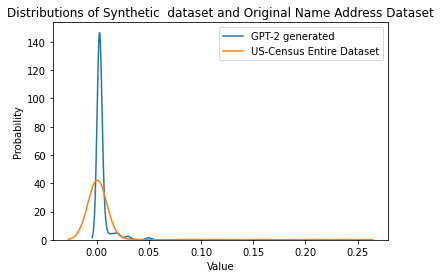

In [2]:
import csv
import numpy as np
import seaborn as sns
from scipy.stats import entropy
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Read the data from the first CSV file
with open('/content/single_text.txt', 'r') as file1:
    reader1 = csv.reader(file1)
    data1 = [row[0] for row in reader1]

# Read the data from the second CSV file
with open('/content/CleanedDatasetEntire1.txt', 'r') as file2:
    reader2 = csv.reader(file2)
    data2 = [row[0] for row in reader2]

# Convert the strings into a vector representation
vectorizer = CountVectorizer()
data1_vector = vectorizer.fit_transform(data1)
data2_vector = vectorizer.transform(data2)

# Convert the vector representation into a numpy array
data1_array = data1_vector.toarray().sum(axis=0)
data2_array = data2_vector.toarray().sum(axis=0)

# Normalize the arrays
data1_array = data1_array / data1_array.sum()
data2_array = data2_array / data2_array.sum()

# Add a small constant to all elements
data1_array = data1_array + 1e-10
data2_array = data2_array + 1e-10

# Normalize the arrays again
data1_array = data1_array / data1_array.sum()
data2_array = data2_array / data2_array.sum()

# Calculate the KL divergence between the two arrays
kl_divergence = entropy(data1_array, data2_array)

print("The KL divergence between the two arrays is:", kl_divergence)

# Plot the arrays using seaborn
sns.distplot(data1_array, hist=False, label='GPT-2 generated')
sns.distplot(data2_array, hist=False, label='US-Census Entire Dataset')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Distributions of Synthetic  dataset and Original Name Address Dataset')
plt.legend()
plt.show()


#Find Cosine Similiarty between synthetic dataset and generated dataset

Cosine similarity finds similarity between 

a. Two non-zero vectors of inner product space

b. Cosine angle between two vectors 

c. Cosine similiarity is between -1 and 1 

d. Score of -1 represents dissimiliarty 


e. Closer to 1 means, more similiar are vectors 

In [20]:
import math
import string
from collections import Counter

def read_file(file_name):
    with open(file_name, 'r') as file:
        return file.read()

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

def get_cosine_similarity(text1, text2):
    text1 = clean_text(text1)
    text2 = clean_text(text2)

    words1 = text1.split()
    words2 = text2.split()

    word_counts1 = Counter(words1)
    word_counts2 = Counter(words2)

    common_words = set(word_counts1.keys()) & set(word_counts2.keys())

    dot_product = sum(word_counts1[word] * word_counts2[word] for word in common_words)
    magnitude1 = math.sqrt(sum(word_counts1[word] ** 2 for word in word_counts1.keys()))
    magnitude2 = math.sqrt(sum(word_counts2[word] ** 2 for word in word_counts2.keys()))

    return dot_product / (magnitude1 * magnitude2)

text1 = read_file('CleanedDatasetEntire1.txt')
text2 = read_file('single_text.txt')

cosine_similarity = get_cosine_similarity(text1, text2)

print('Cosine Similarity between Synthetic dataset and original dataset:', cosine_similarity)


Cosine Similarity between Synthetic dataset and original dataset: 0.7858525424598748


In [ ]:
import math
import string
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def read_file(file_name):
    with open(file_name, 'r') as file:
        return file.read()

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

def get_cosine_similarity(text1, text2):
    text1 = clean_text(text1)
    text2 = clean_text(text2)

    words1 = text1.split()
    words2 = text2.split()

    word_counts1 = Counter(words1)
    word_counts2 = Counter(words2)

    common_words = set(word_counts1.keys()) & set(word_counts2.keys())

    dot_product = sum(word_counts1[word] * word_counts2[word] for word in common_words)
    magnitude1 = math.sqrt(sum(word_counts1[word] ** 2 for word in word_counts1.keys()))
    magnitude2 = math.sqrt(sum(word_counts2[word] ** 2 for word in word_counts2.keys()))

    return dot_product / (magnitude1 * magnitude2)

text1 = read_file('CleanedDatasetEntire1.txt')
text2 = read_file('single_text.txt')

cosine_similarity = get_cosine_similarity(text1, text2)

print('Cosine Similarity:', cosine_similarity)

sns.set_style("whitegrid")
sns.barplot(x=["Cosine Similarity"], y=[cosine_similarity], color="blue")
plt.title("Cosine Similarity between CleanedDatasetEntire1.txt and single_text.txt")
plt.xlabel("Similarity Metric")
plt.ylabel("Similarity Score")
plt.show()


Cosine Similarity: 0.7858525424598748


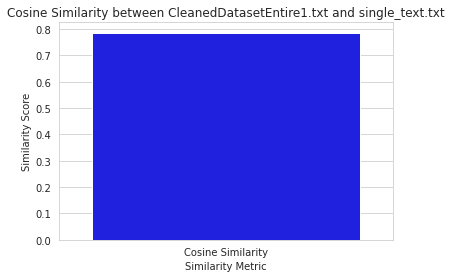

In [19]:
import math
import string
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def read_file(file_name):
    with open(file_name, 'r') as file:
        return file.read()

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

def get_cosine_similarity(text1, text2):
    text1 = clean_text(text1)
    text2 = clean_text(text2)

    words1 = text1.split()
    words2 = text2.split()

    word_counts1 = Counter(words1)
    word_counts2 = Counter(words2)

    common_words = set(word_counts1.keys()) & set(word_counts2.keys())

    dot_product = sum(word_counts1[word] * word_counts2[word] for word in common_words)
    magnitude1 = math.sqrt(sum(word_counts1[word] ** 2 for word in word_counts1.keys()))
    magnitude2 = math.sqrt(sum(word_counts2[word] ** 2 for word in word_counts2.keys()))

    return dot_product / (magnitude1 * magnitude2)

text1 = read_file('CleanedDatasetEntire1.txt')
text2 = read_file('single_text.txt')

cosine_similarity = get_cosine_similarity(text1, text2)

print('Cosine Similarity:', cosine_similarity)


sns.set_style("whitegrid")
sns.barplot(x=["Cosine Similarity"], y=[cosine_similarity], color="blue")
plt.title("Cosine Similarity between CleanedDatasetEntire1.txt and single_text.txt")
plt.xlabel("Similarity Metric")
plt.ylabel("Similarity Score")
plt.show()


In [14]:
sns.lineplot(data=flights, x="passengers", y="year", orient="y")

NameError: ignored